In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

path_to_processed = '../data/processed/'
path_to_dataset = path_to_processed + 'full_dataset_top589.csv'

In [2]:
data = pd.read_csv(path_to_dataset, low_memory=False)
data_df = pd.DataFrame(data)
data_df.tail()

,gbifID,scientificName
3227300,4881080482,Cerastis rubricosa
3227301,1967699301,Cerastis rubricosa
3227302,3728917741,Cerastis rubricosa
3227303,3826133172,Cerastis rubricosa
3227304,3824611903,Cerastis rubricosa


In [3]:
species_counts = data['scientificName'].value_counts()
print(species_counts)
data['scientificName'].describe()

scientificName
Pararge aegeria            75939
Vanessa atalanta           61570
Noctua pronuba             50457
Aglais io                  49595
Lycaena phlaeas            47993
                           ...  
Parornix spec.              1006
Hypomecis roboraria         1004
Eupithecia tripunctaria     1004
Glaucopsyche alexis         1002
Cerastis rubricosa          1001
Name: count, Length: 589, dtype: int64


count             3227305
unique                589
top       Pararge aegeria
freq                75939
Name: scientificName, dtype: object

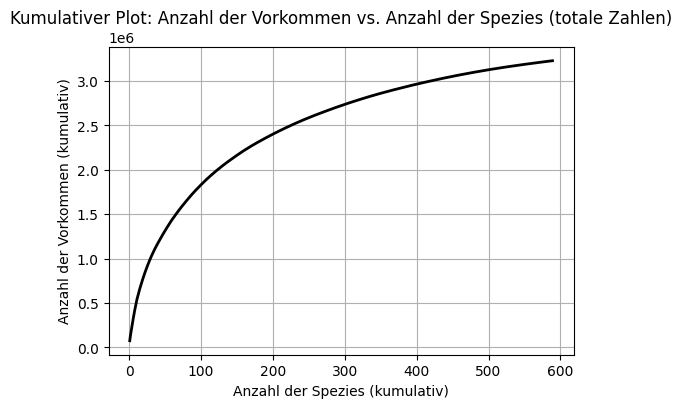

In [4]:
species_counts_sorted = species_counts.sort_values(ascending=False)
cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_species, cumulative_occurrences, color='black', lw=2)

plt.title('Kumulativer Plot: Anzahl der Vorkommen vs. Anzahl der Spezies (totale Zahlen)')
plt.xlabel('Anzahl der Spezies (kumulativ)')
plt.ylabel('Anzahl der Vorkommen (kumulativ)')
plt.grid(True)
plt.show()

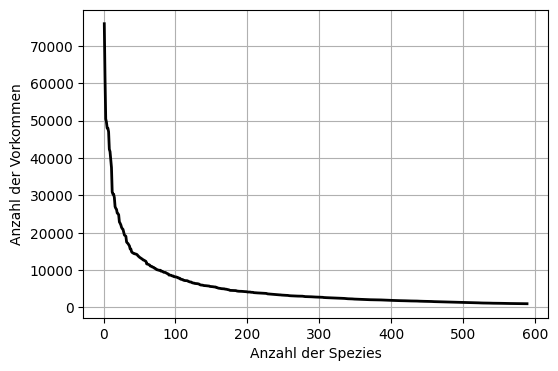

In [5]:
species_counts_sorted = species_counts.sort_values(ascending=False)
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_species, species_counts_sorted, color='black', lw=2)

plt.xlabel('Anzahl der Spezies')
plt.ylabel('Anzahl der Vorkommen')
plt.grid(True)
plt.show()

In [6]:
print(f'Average amount of samples per class: {np.mean(species_counts):.1f}')

Average amount of samples per class: 5479.3


In [ ]:
# Die anzahl der Samples zu downloaden wenn man die Anzahl auf 5000 pro spezies beschränkt
large_species_samples = len(species_counts[species_counts > 5000]) * 5000
small_species_samples = species_counts[species_counts < 5000].sum()
print(f"Amount of samples to download with " \
            f"max 5000 images per species: {large_species_samples + small_species_samples}")

Amount of samples to download withmax 5000 images per species: 1809956


### For final dataset:
- augment classes with fewer samples up to 5500
- randomly select 5500 samples out of the bigger samples
- !!! DATASET HAS NOT BEEN CLEANED YET => POSSIBLY LOWER AVERAGE OF SAMPLES !!!